<h2><center>Import modules</center></h2>

In [ ]:
import os
import cv2
import numpy as np
from imutils import paths

In [ ]:
imagepaths = list(paths.list_images("/content/drive/MyDrive/ml/train"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imagepaths

['/content/drive/MyDrive/ml/train/Papers/papercard (155).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (17).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (2).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (133).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (22).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (115).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (240).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (4).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (210).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (241).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (124).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (168).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (41).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (146).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (235).jpg',
 '/content/drive/MyDrive/ml/train/Papers/papercard (188).jpg',

In [ ]:
from tqdm import tqdm

In [ ]:
data = []
labels = []
for images in tqdm(imagepaths):
    label = images.split(os.path.sep)[-2]
    image =cv2.imread(images)
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image, (100,100))
    image = np.asarray(image)
    image = np.reshape(image,(30000))
    data.append(image)
    labels.append(label)

In [ ]:
# import pickle
# pickle.dump(data, open('/content/drive/MyDrive/ml/final/svm/data.pkl', 'wb'))
# pickle.dump(labels, open('/content/drive/MyDrive/ml/final/svm/labels.pkl', 'wb'))

<h2><center>Loading pickles</center></h2>

In [ ]:
import pickle
data = pickle.load(open('/content/drive/MyDrive/ml/final/svm/data.pkl', 'rb'))
labels = pickle.load(open('/content/drive/MyDrive/ml/final/svm/labels.pkl', 'rb'))

In [ ]:
mapping = ['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers', 'Plastics', 'recyclable waste', 'trash']

In [ ]:
def index(x):
    for i in range(9):
        if(mapping[i] == x):
            return i;
    return -1;

In [ ]:
ilabels = []
for l in labels:
    ilabels.append(index(l))
labels = ilabels

In [ ]:
labels

In [ ]:
data = np.asarray(data)
labels = np.asarray(labels)

In [ ]:
print(data.shape)
print(labels.shape)

(4833, 30000)
(4833,)


In [ ]:
 def prep_pixels(test):
 	# convert from integers to floats
 	test_norm = np.array(test).astype('float32')
 	# normalize to range 0-0
 	test_norm = test_norm/ 255.0
 	# return normalized images
 	return test_norm

data = prep_pixels(data)

In [ ]:
from sklearn.model_selection import train_test_split
traindata, testdata, trainlabels, testlabels = train_test_split(data, labels, random_state = 32, test_size=0.15)

In [ ]:
print(traindata.shape)
print(testdata.shape)
print(trainlabels.shape)
print(testlabels.shape)

(4108, 30000)
(725, 30000)
(4108,)
(725,)


<h2><center>Linear Kernel</center></h2>

In [ ]:
from sklearn.svm import SVC
#model = SVC(probability=True)


model = SVC()

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(traindata, trainlabels)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
pred_labels = model.predict(testdata)
print(pred_labels)

[0 0 4 3 6 6 2 7 7 6 7 7 6 5 5 2 7 6 2 5 5 7 3 6 6 1 6 5 2 6 2 1 0 2 5 1 6
 5 7 7 2 1 7 7 2 1 6 7 6 0 1 2 6 7 2 7 6 2 8 1 7 5 2 0 5 6 5 6 5 8 2 2 6 2
 6 2 7 5 5 6 6 7 1 6 1 6 1 5 1 6 0 2 4 7 7 4 7 0 8 5 3 5 2 1 7 4 1 5 0 5 2
 2 0 5 2 5 6 5 7 7 6 2 0 5 8 6 5 0 2 5 8 5 2 7 7 3 7 5 6 0 0 2 6 5 5 6 2 2
 7 1 0 6 5 5 5 5 6 2 2 7 5 7 2 6 3 5 6 3 6 5 5 5 0 5 5 2 7 7 2 2 4 7 0 7 5
 6 2 8 7 3 2 5 2 5 6 6 6 4 6 6 5 5 7 4 5 0 6 5 4 6 7 2 5 7 7 6 0 6 2 5 0 1
 2 5 5 5 1 2 0 3 7 1 5 2 1 7 1 5 5 5 5 2 6 6 0 5 1 7 2 5 2 7 6 6 5 4 3 0 7
 8 6 2 6 7 1 2 6 6 5 6 0 2 2 5 6 2 7 3 5 6 1 5 6 6 2 4 7 6 5 6 6 6 2 7 2 6
 6 7 6 2 8 2 2 6 2 6 4 5 7 2 7 6 3 6 2 4 2 2 1 2 6 2 1 7 7 6 4 7 6 5 2 2 6
 2 6 7 5 7 2 2 7 2 7 0 7 0 7 5 7 6 6 4 1 2 7 6 7 5 0 6 5 2 7 6 3 2 5 6 1 5
 6 5 1 2 6 7 7 6 5 7 1 6 7 5 6 1 7 2 7 7 0 7 2 7 1 2 5 5 0 7 5 6 1 5 7 5 6
 5 1 6 5 5 5 6 1 5 1 6 6 2 6 5 2 5 4 7 6 7 5 6 2 6 0 8 2 5 6 5 2 2 3 5 5 7
 6 5 7 4 2 7 7 0 5 1 1 6 6 6 0 6 2 6 6 6 7 2 0 2 7 5 2 6 7 5 6 2 7 5 5 7 7
 5 2 2 6 7 2 1 4 5 5 5 6 

In [ ]:
pred_labels = np.asarray(pred_labels)

In [ ]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(testlabels, pred_labels)
print(cf_matrix)

[[19  2 12  3  7 15  9  3  3]
 [ 4 31  5  1  3  6 11  5  1]
 [ 6  1 66  3  0 27  6 12  1]
 [ 4  0  4  6  0  4  3  3  0]
 [ 4  0  5  1  6  0  3  1  0]
 [ 3  2 19  2  0 60 27 22  3]
 [ 5  6  5  2  2 13 78 20  1]
 [ 4  8  7  1  0 21 23 52  2]
 [ 4  5  2  1  0  7  4  6  2]]


In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

<h2><center>Confusion matrix</center></h2>

Confusion matrix, with normalization


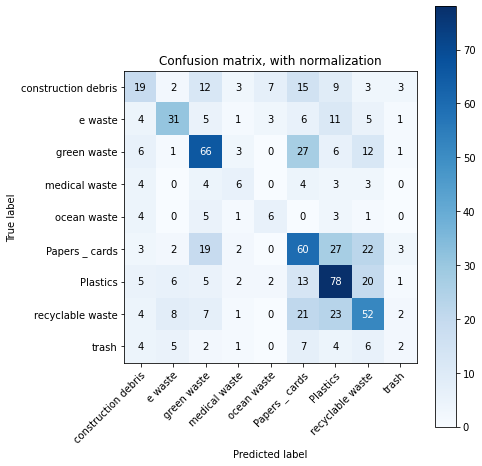

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(testlabels, pred_labels)

#Defining the class labels
class_names=['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers _ cards', 'Plastics', 'recyclable waste', 'trash']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(testlabels, pred_labels, classes = class_names, title='Confusion matrix, with normalization')

In [ ]:
accuracy_score(pred_labels,testlabels)

0.4413793103448276

<h2><center>Poly Kernel</center></h2>

In [ ]:
model = SVC(kernel='poly',degree=4)

In [ ]:
model.fit(traindata, trainlabels)

SVC(degree=4, kernel='poly')

In [ ]:
sets = set()
count = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in testlabels:
  sets.add(i)
  count[i] += 1

count

[73, 67, 122, 24, 20, 138, 132, 118, 31]

In [ ]:
sets = set()
count = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in trainlabels:
  sets.add(i)
  count[i] += 1

count

[375, 365, 733, 140, 101, 803, 767, 655, 169]

In [ ]:
from sklearn.metrics import accuracy_score
pred_labels = model.predict(testdata)
print(pred_labels)

[0 2 4 7 0 6 2 7 7 6 7 7 6 5 7 2 6 6 2 7 7 7 3 2 0 2 6 5 2 6 2 1 6 2 5 1 5
 2 5 7 7 1 5 1 7 8 6 5 0 2 1 1 6 7 5 7 0 2 6 1 7 2 2 0 5 6 5 4 0 8 2 2 3 2
 6 7 7 5 5 6 6 6 7 6 5 7 1 5 1 7 2 2 2 7 7 4 3 6 2 5 3 0 2 5 7 4 1 3 0 5 2
 2 2 5 2 5 6 6 5 7 6 2 0 5 8 6 5 8 2 1 3 5 5 7 2 3 3 5 6 0 0 2 5 5 6 6 2 2
 2 1 5 7 5 5 2 5 6 2 2 8 5 7 2 6 3 5 6 0 6 8 5 7 0 5 5 2 7 5 2 2 4 6 0 7 5
 6 7 8 6 3 2 5 4 5 7 8 7 4 6 6 2 5 7 4 7 5 6 5 1 5 5 2 7 7 6 6 2 6 5 5 0 8
 5 5 1 5 1 5 0 6 7 1 5 5 1 3 0 5 2 2 2 2 6 7 2 7 1 6 7 5 2 7 2 6 5 6 3 0 7
 8 6 2 6 7 7 2 8 6 6 6 2 5 2 2 6 7 7 0 5 5 1 5 6 6 5 1 7 5 7 5 6 6 2 1 2 6
 6 7 6 2 8 2 2 6 5 6 0 5 7 2 6 7 3 0 2 4 2 2 8 2 6 2 1 7 7 5 4 5 6 2 2 5 6
 2 3 5 2 7 2 2 7 2 7 2 6 2 7 5 2 6 6 8 6 2 2 7 7 6 2 3 2 0 7 6 3 2 5 6 1 5
 7 0 2 2 6 1 7 0 6 7 1 4 7 5 6 1 7 2 6 7 2 5 2 7 1 5 2 5 2 7 2 6 1 0 7 6 6
 5 1 6 5 5 8 6 1 5 1 6 0 2 6 5 2 5 0 5 6 7 5 7 2 6 0 6 2 5 7 8 5 5 0 6 5 7
 6 7 7 6 2 7 7 2 5 8 1 6 6 5 2 6 2 6 2 3 7 2 0 2 2 1 2 6 7 7 5 3 5 5 5 7 1
 2 0 2 7 7 2 7 4 7 5 6 7 

In [ ]:
accuracy_score(pred_labels,testlabels)

0.5048275862068966

In [ ]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(testlabels, pred_labels)
print(cf_matrix)

[[18  8 16  4  1 10 13  1  2]
 [ 2 37  8  3  3  5  3  4  2]
 [ 0  0 85  2  0 21  2 10  2]
 [ 2  1  7  6  0  3  2  1  2]
 [ 1  0  4  0  7  0  8  0  0]
 [ 6  1 11  2  0 77 18 19  4]
 [ 6  4  6  5  3 13 70 23  2]
 [ 2  4 11  2  0 16 20 58  5]
 [ 1  1  7  1  1  5  2  5  8]]


In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

<h2><center>Confusion matrix</center></h2>

Confusion matrix, with normalization


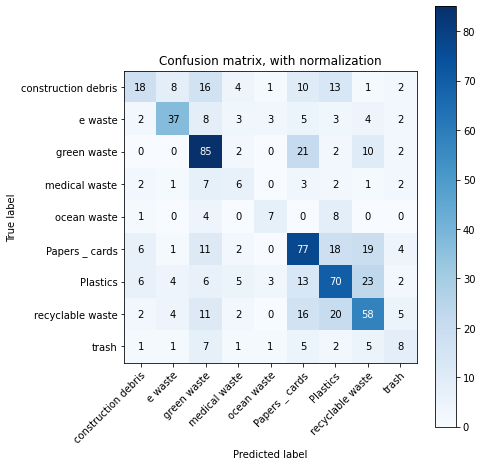

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(testlabels, pred_labels)

#Defining the class labels
class_names=['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers _ cards', 'Plastics', 'recyclable waste', 'trash']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(testlabels, pred_labels, classes = class_names, title='Confusion matrix, with normalization')

<h2><center>Linear Kernel</center></h2>

In [ ]:
model = SVC(kernel='linear', C=0.6)
model.fit(traindata, trainlabels)

SVC(C=0.6, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
pred_labels = model.predict(testdata)
print(pred_labels)

print("Accuracy: ",accuracy_score(pred_labels,testlabels)*100,"%")

[0 0 4 3 6 6 2 7 7 6 7 7 6 5 5 2 7 6 2 5 5 7 3 6 6 1 6 5 2 6 2 1 0 2 5 1 6
 5 7 7 2 1 7 7 2 1 6 7 6 0 1 2 6 7 2 7 6 2 8 1 7 5 2 0 5 6 5 6 5 8 2 2 6 2
 6 2 7 5 5 6 6 7 1 6 1 6 1 5 1 6 0 2 4 7 7 4 7 0 8 5 3 5 2 1 7 4 1 5 0 5 2
 2 0 5 2 5 6 5 7 7 6 2 0 5 8 6 5 0 2 5 8 5 2 7 7 3 7 5 6 0 0 2 6 5 5 6 2 2
 7 1 0 6 5 5 5 5 6 2 2 7 5 7 2 6 3 5 6 3 6 5 5 5 0 5 5 2 7 7 2 2 4 7 0 7 5
 6 2 8 7 3 2 5 2 5 6 6 6 4 6 6 5 5 7 4 5 0 6 5 4 6 7 2 5 7 7 6 0 6 2 5 0 1
 2 5 5 5 1 2 0 3 7 1 5 2 1 7 1 5 5 5 5 2 6 6 0 5 1 7 2 5 2 7 6 6 5 4 3 0 7
 8 6 2 6 7 1 2 6 6 5 6 0 2 2 5 6 2 7 3 5 6 1 5 6 6 2 4 7 6 5 6 6 6 2 7 2 6
 6 7 6 2 8 2 2 6 2 6 4 5 7 2 7 6 3 6 2 4 2 2 1 2 6 2 1 7 7 6 4 7 6 5 2 2 6
 2 6 7 5 7 2 2 7 2 7 0 7 0 7 5 7 6 6 4 1 2 7 6 7 5 0 6 5 2 7 6 3 2 5 6 1 5
 6 5 1 2 6 7 7 6 5 7 1 6 7 5 6 1 7 2 7 7 0 7 2 7 1 2 5 5 0 7 5 6 1 5 7 5 6
 5 1 6 5 5 5 6 1 5 1 6 6 2 6 5 2 5 4 7 6 7 5 6 2 6 0 8 2 5 6 5 2 2 3 5 5 7
 6 5 7 4 2 7 7 0 5 1 1 6 6 6 0 6 2 6 6 6 7 2 0 2 7 5 2 6 7 5 6 2 7 5 5 7 7
 5 2 2 6 7 2 1 4 5 5 5 6 